# MetPy Calculations

In [1]:
from datetime import datetime, timedelta

import metpy.calc as mpcalc
from metpy.plots.declarative import *
from metpy.units import units
import xarray as xr

In [11]:
# Set the date/time of the model run
date = datetime(2020, 5, 15, 12)

# Remote access to the dataset from the UCAR site
org_ds = xr.open_dataset('https://thredds.ucar.edu/thredds/dodsC/grib/NCEP/GFS/'
                         f'Global_0p5deg_ana/GFS_Global_0p5deg_ana_{date:%Y%m%d_%H}00.grib2')

# Set the plot time with forecast hours
plot_time = date

# Subset data to be just over the U.S. for plotting purposes and for the plot_time
ds = org_ds.metpy.sel(lat=slice(70,10), lon=slice(360-150, 360-55))

## More Complex Calculations

1. Do the calculation using MetPy (not too hard).
2. Add it to the dataarray (a little more complicated).

All MetPy Calculations can be found at https://unidata.github.io/MetPy/v1.0/api/generated/metpy.calc.html#module-metpy.calc

Not all calculations work on grids, yet!

To calculate wind speed: https://unidata.github.io/MetPy/v1.0/api/generated/metpy.calc.wind_speed.html#metpy.calc.wind_speed

We can add a new variable based on a simialr one, then update the values based on the calculation. This is easy for wind speed as it is a variant on a single component of the wind.

In [12]:
# Calculate Wind Speed
wspd = mpcalc.wind_speed(ds['u-component_of_wind_isobaric'], ds['v-component_of_wind_isobaric'])

# Add it to dataset (ds) based on similar variable
ds = ds.assign(wind_speed = wspd)

Found valid latitude/longitude coordinates, assuming latitude_longitude for projection grid_mapping variable


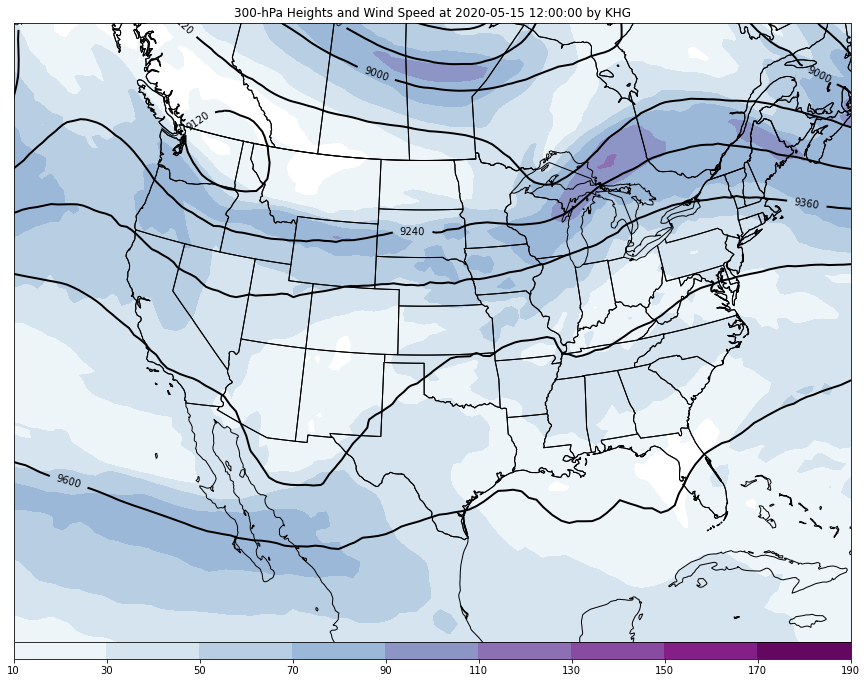

In [16]:
# Set attributes for plotting contours
cfill = FilledContourPlot()
cfill.data = ds
cfill.field = 'wind_speed'
cfill.level = 300 * units.hPa
cfill.time = plot_time
cfill.contours = list(range(10, 201, 20))
cfill.colormap = 'BuPu'
cfill.colorbar = 'horizontal'
cfill.plot_units = 'knot'

cntr2 = ContourPlot()
cntr2.data = ds
cntr2.field = 'Geopotential_height_isobaric'
cntr2.level = 300 * units.hPa
cntr2.time = plot_time
cntr2.contours = list(range(0, 10000, 120))
cntr2.linecolor = 'black'
cntr2.linestyle = 'solid'
cntr2.clabels = True

# Set the attributes for the map
# and put the contours on the map
panel = MapPanel()
panel.area = [-125, -74, 20, 55]
panel.projection = 'lcc'
panel.layers = ['states', 'coastline', 'borders']
panel.title = f'{cfill.level.m}-hPa Heights and Wind Speed at {plot_time} by KHG'
panel.plots = [cfill, cntr2]

# Set the attributes for the panel
# and put the panel in the figure
pc = PanelContainer()
pc.size = (15, 15)
pc.panels = [panel]

# Show the figure
pc.show()